## Week 3: Web Scraping TripAdvisor

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [60]:
elnido_info = pd.read_csv('elnido_info.csv')
elnido_recog = pd.read_csv('elnido_recog.csv')
elnido_rooms = pd.read_csv('elnido_rooms.csv')
elnido_amenities = pd.read_csv('elnido_amenities.csv')

In [61]:
display(elnido_info.columns)
display(elnido_recog.columns)
display(elnido_rooms.columns)
display(elnido_amenities.columns)

Index(['Location', 'Hotel_Name', 'Price', 'Viewers', 'Total_Pics',
       'Traveler_Pics', 'Rating', 'Total_Reviews'],
      dtype='object')

Index(['Location', 'Hotel_Name', 'Recognition'], dtype='object')

Index(['Location', 'Hotel_Name', 'Room_Features'], dtype='object')

Index(['Location', 'Hotel_Name', 'Amenities'], dtype='object')

## Data Cleaning

**Focusing on basic information of hotel**: <br />
'Location', 'Hotel_Name', 'Price', 'Viewers', 'Total_Pics', 'Traveler_Pics', 'Rating', 'Total_Reviews'

In [62]:
# remove columns
elnido_info
info = elnido_info[~elnido_info['Location'].str.contains('Location') == True]
info.head()

,Location,Hotel_Name,Price,Viewers,Total_Pics,Traveler_Pics,Rating,Total_Reviews
0,El_Nido,Frangipani El Nido,NaN,NaN,View all photos (114)114,Traveler (98),5.0,19 reviews
2,El_Nido,El Nido Resorts Lagen Island,US$476,NaN,"View all photos (2,040)2,040",Traveler (1676),4.5,892 reviews
4,El_Nido,Periking El Nido,US$39,NaN,View all photos (102)102,Traveler (93),4.0,179 reviews
6,El_Nido,Casa Felicidad Beach Cottages,US$33,NaN,View all photos (85)85,Traveler (29),4.5,19 reviews
8,El_Nido,Telesfora Beach Cottages,US$67,NaN,View all photos (121)121,Traveler (121),4.0,94 reviews


In [63]:
price = pd.read_csv('elnido_price.csv')
price = price.dropna()
price.head()

,Location,Hotel_Name,Price
1,El_Nido,The Nest El Nido Beach Resort,"PHP 6,300"
2,El_Nido,Tapik Beach Park Guest House,"PHP 1,202"
4,El_Nido,El Nido Mahogany Beach Resort,"PHP 7,280"
5,El_Nido,El Nido Overlooking,"PHP 6,182"
7,El_Nido,Qi Palawan,"PHP 10,250"


In [64]:
merged = pd.merge(info, price, on='Hotel_Name', how='left')
merged = merged.drop_duplicates(subset='Hotel_Name')
cols = ['Location_y', 'Price_x', 'Viewers']
merged = merged.drop(columns=cols)
merged.columns = ['location', 'hotel', 'tot_pics', 'travel_pics', 'rating', 'tot_reviews', 'price']
merged
merged = merged.dropna()
merged

,location,hotel,tot_pics,travel_pics,rating,tot_reviews,price
0,El_Nido,Frangipani El Nido,View all photos (114)114,Traveler (98),5.0,19 reviews,"PHP 12,500"
2,El_Nido,El Nido Resorts Lagen Island,"View all photos (2,040)2,040",Traveler (1676),4.5,892 reviews,"PHP 24,867"
3,El_Nido,Periking El Nido,View all photos (102)102,Traveler (93),4.0,179 reviews,"PHP 2,050"
5,El_Nido,Casa Felicidad Beach Cottages,View all photos (85)85,Traveler (29),4.5,19 reviews,"PHP 1,748"
7,El_Nido,Telesfora Beach Cottages,View all photos (121)121,Traveler (121),4.0,94 reviews,"PHP 3,500"
10,El_Nido,Las Cabanas Beach Resort,View all photos (320)320,Traveler (320),4.0,247 reviews,"PHP 4,018"
12,El_Nido,Lio Villas,View all photos (127)127,Traveler (121),4.0,114 reviews,"PHP 3,750"
56,El_Nido,Giecel Pension,View all photos (7)7,Traveler (7),2.5,13 reviews,"₱2,679"
81,El_Nido,Residencia Katrina Bed and Breakfast,View all photos (21)21,Traveler (11),3.0,39 reviews,"₱1,800"
83,El_Nido,Lualhati Cottages,View all photos (7)7,Traveler (7),3.0,25 reviews,"₱1,530"


In [65]:
# cleaning values of the columns
merged['price'] = merged['price'].str.replace('PHP', '')
merged['price'] = merged['price'].str.replace('₱', '')
merged['price'] = merged['price'].str.replace(',', '')
merged['tot_reviews'] = merged['tot_reviews'].str.replace('reviews', '')
merged['tot_reviews'] = merged['tot_reviews'].str.replace('review', '')
merged['tot_reviews'] = merged['tot_reviews'].str.replace(' ', '')
merged['tot_pics'].apply(lambda x: re.findall(r'(?<=\))\d+',str(x)))
merged['travel_pics'] = merged['travel_pics'].str.extract(r'\((.*?)\)', expand=False)
merged['tot_pics'] = merged['tot_pics'].str.extract(r'\((.*?)\)', expand=False)
merged

,location,hotel,tot_pics,travel_pics,rating,tot_reviews,price
0,El_Nido,Frangipani El Nido,114,98,5.0,19,12500
2,El_Nido,El Nido Resorts Lagen Island,"2,040",1676,4.5,892,24867
3,El_Nido,Periking El Nido,102,93,4.0,179,2050
5,El_Nido,Casa Felicidad Beach Cottages,85,29,4.5,19,1748
7,El_Nido,Telesfora Beach Cottages,121,121,4.0,94,3500
10,El_Nido,Las Cabanas Beach Resort,320,320,4.0,247,4018
12,El_Nido,Lio Villas,127,121,4.0,114,3750
56,El_Nido,Giecel Pension,7,7,2.5,13,2679
81,El_Nido,Residencia Katrina Bed and Breakfast,21,11,3.0,39,1800
83,El_Nido,Lualhati Cottages,7,7,3.0,25,1530


In [115]:
merged['tot_pics'] = merged['tot_pics'].str.replace(',', '')
merged['travel_pics'] = merged['travel_pics'].str.replace(',', '')

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [105]:
merged['tot_pics'] = merged['tot_pics'].astype('int')
merged['travel_pics'] = merged['travel_pics'].astype('int')
merged['rating'] = merged['rating'].astype('float')
merged['tot_reviews'] = merged['tot_reviews'].astype('int')

In [88]:
coron_merged = pd.read_csv('coron_merged.csv')
coron_merged.reset_index()
coron_merged = coron_merged.drop(columns=['Unnamed: 0'])
coron_merged

,location,hotel,tot_pics,travel_pics,rating,tot_reviews,price
0,Coron,Darayonan Lodge,204,204,3.5,160,2300
1,Coron,Coron Soleil Express Hotel,21,11,3.0,29,5453
2,Coron,Coron Gateway Hotel & Suites,194,194,3.5,155,2615
3,Coron,Seaview Pension House,19,10,4.0,15,915
4,Coron,Kalis Viewpoint Lodge Coron,9,9,4.0,5,1455
5,Coron,Zuric Pension House,66,66,3.5,139,1473
6,Coron,SunValley Tourist Inn,38,14,4.0,13,3600
7,Coron,Casa Coron Hotel,59,53,4.0,101,2437
8,Coron,Casa Montemar Bed and Breakfast,82,82,3.5,83,1600
9,Coron,Charms Hotel,15,11,4.5,18,2679


In [102]:
# append the 2 datasets
merged = merged.append(coron_merged, ignore_index=True)
merged

,location,hotel,tot_pics,travel_pics,rating,tot_reviews,price
0,El_Nido,Frangipani El Nido,114,98,5.0,19,12500
1,El_Nido,El Nido Resorts Lagen Island,2040,1676,4.5,892,24867
2,El_Nido,Periking El Nido,102,93,4.0,179,2050
3,El_Nido,Casa Felicidad Beach Cottages,85,29,4.5,19,1748
4,El_Nido,Telesfora Beach Cottages,121,121,4.0,94,3500
5,El_Nido,Las Cabanas Beach Resort,320,320,4.0,247,4018
6,El_Nido,Lio Villas,127,121,4.0,114,3750
7,El_Nido,Giecel Pension,7,7,2.5,13,2679
8,El_Nido,Residencia Katrina Bed and Breakfast,21,11,3.0,39,1800
9,El_Nido,Lualhati Cottages,7,7,3.0,25,1530


In [112]:
el_nido = merged.loc[merged['location'] == 'El_Nido']
coron = merged.loc[merged['location'] == 'Coron']

In [114]:
display(el_nido.describe(include='all'))
display(coron.describe(include='all'))

,location,hotel,tot_pics,travel_pics,rating,tot_reviews,price
count,60,60,60.000000,60.000000,60.000000,60.000000,60
unique,1,60,NaN,NaN,NaN,NaN,58
top,El_Nido,Lolo Bob's Bed and Breakfast,NaN,NaN,NaN,NaN,900
freq,60,1,NaN,NaN,NaN,NaN,2
mean,NaN,NaN,182.416667,138.883333,3.950000,115.216667,NaN
std,NaN,NaN,318.827741,253.351574,0.601552,154.650957,NaN
min,NaN,NaN,7.000000,2.000000,2.500000,2.000000,NaN
25%,NaN,NaN,24.000000,14.750000,3.500000,19.000000,NaN
50%,NaN,NaN,59.500000,38.000000,4.000000,69.000000,NaN
75%,NaN,NaN,193.750000,153.000000,4.500000,149.250000,NaN


,location,hotel,tot_pics,travel_pics,rating,tot_reviews,price
count,44,44,44.000000,44.000000,44.000000,44.000000,44.0
unique,1,22,NaN,NaN,NaN,NaN,22.0
top,Coron,SunValley Tourist Inn,NaN,NaN,NaN,NaN,2300.0
freq,44,2,NaN,NaN,NaN,NaN,2.0
mean,NaN,NaN,182.045455,155.636364,3.977273,121.090909,NaN
std,NaN,NaN,228.911982,206.981528,0.516637,116.666453,NaN
min,NaN,NaN,9.000000,9.000000,3.000000,5.000000,NaN
25%,NaN,NaN,29.000000,17.000000,3.500000,29.000000,NaN
50%,NaN,NaN,62.500000,59.500000,4.000000,92.000000,NaN
75%,NaN,NaN,204.000000,194.000000,4.500000,160.000000,NaN


In [119]:
five_rating = merged.loc[merged['rating'] == 5.0]
four_five_rating = merged.loc[merged['rating'] == 4.5]
four_rating = merged.loc[merged['rating'] == 4.0]

In [121]:
high_rating = five_rating.append([four_five_rating, four_rating])

C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1152x432 with 0 Axes>

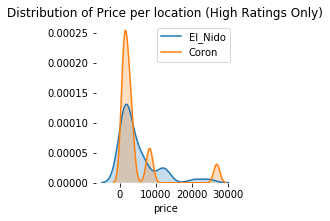

In [124]:
plt.figure(figsize=(16, 6))
g = sns.FacetGrid(high_rating, hue='location')
g.map(sns.kdeplot, "price", shade=True)
plt.legend(loc='upper right')
plt.title('Distribution of Price per location (High Ratings Only)')
sns.despine(left=True, bottom=True)
plt.show()

In [132]:
one_rating = merged.loc[merged['rating'] == 2.5]
one_five_rating = merged.loc[merged['rating'] == 3.0]
two_rating = merged.loc[merged['rating'] == 3.5]

In [134]:
low_rating = one_rating.append([one_five_rating, two_rating])

In [130]:
merged['rating'].describe()

count    104.000000
mean       3.961538
std        0.564708
min        2.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1152x432 with 0 Axes>

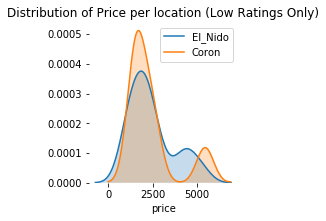

In [135]:
plt.figure(figsize=(16, 6))
g = sns.FacetGrid(low_rating, hue='location')
g.map(sns.kdeplot, "price", shade=True)
plt.legend(loc='upper right')
plt.title('Distribution of Price per location (Low Ratings Only)')
sns.despine(left=True, bottom=True)
plt.show()

In [137]:
merged['rating_magnitude'] = merged['tot_reviews'].multiply(merged['rating'])
merged

,location,hotel,tot_pics,travel_pics,rating,tot_reviews,price,rating_magnitude
0,El_Nido,Frangipani El Nido,114,98,5.0,19,12500,95.0
1,El_Nido,El Nido Resorts Lagen Island,2040,1676,4.5,892,24867,4014.0
2,El_Nido,Periking El Nido,102,93,4.0,179,2050,716.0
3,El_Nido,Casa Felicidad Beach Cottages,85,29,4.5,19,1748,85.5
4,El_Nido,Telesfora Beach Cottages,121,121,4.0,94,3500,376.0
5,El_Nido,Las Cabanas Beach Resort,320,320,4.0,247,4018,988.0
6,El_Nido,Lio Villas,127,121,4.0,114,3750,456.0
7,El_Nido,Giecel Pension,7,7,2.5,13,2679,32.5
8,El_Nido,Residencia Katrina Bed and Breakfast,21,11,3.0,39,1800,117.0
9,El_Nido,Lualhati Cottages,7,7,3.0,25,1530,75.0


TypeError: 2300 is not a string

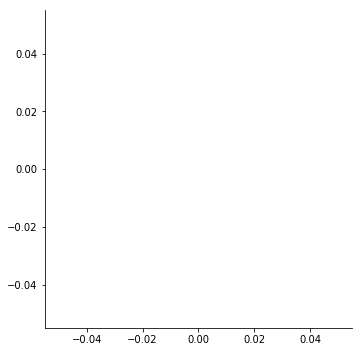

In [142]:
sns.relplot(x="price", y="rating_magnitude", data=merged, kind='scatter')

### EDA - Data Visualization

TypeError: 2300 is not a string

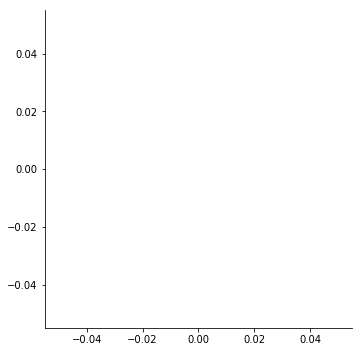

In [106]:
sns.relplot(x='rating', y='price', data=merged, kind='scatter')
plt.show()

C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1152x432 with 0 Axes>

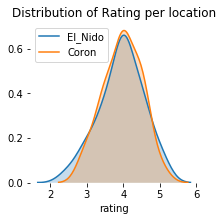

In [145]:
plt.figure(figsize=(16, 6))
g = sns.FacetGrid(merged, hue='location')
g.map(sns.kdeplot, "rating", shade=True)
plt.legend(loc='upper left')
plt.title('Distribution of Rating per location')
sns.despine(left=True, bottom=True)
plt.show()

C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1152x432 with 0 Axes>

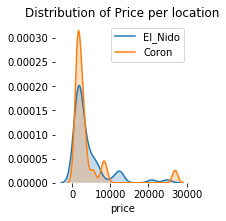

In [101]:
plt.figure(figsize=(16, 6))
g = sns.FacetGrid(merged, hue='location')
g.map(sns.kdeplot, "price", shade=True)
plt.legend(loc='upper right')
plt.title('Distribution of Price per location')
sns.despine(left=True, bottom=True)
plt.show()

C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


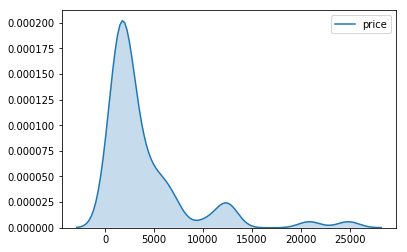

In [73]:
sns.kdeplot(merged['price'], shade=True)

C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\207915\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


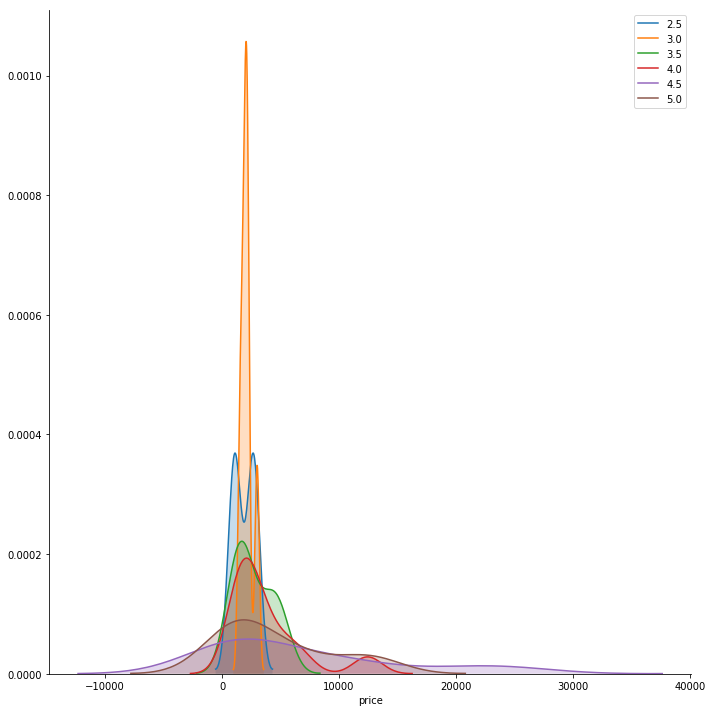

In [78]:
g = sns.FacetGrid(merged, hue='rating', size=10) # use row and hue argument, if only necessary
g.map(sns.kdeplot, 'price', shade=True)
plt.legend()

In [127]:
# cleaning values of the columns
#info['price'] = info['price'].str.replace('US$', '')
#info['tot_pics'] = info['tot_pics'].apply(lambda x: re.findall(r'(?<=\))\d+',str(x)))
#info['travel_pics'].apply(lambda x: re.search('^[0-9]', x))
#info['tot_reviews'] = info['tot_reviews'].str.replace('reviews', '')
#info['tot_reviews'] = info['tot_reviews'].str.replace('review', '')
#info['tot_reviews'] = info['tot_reviews'].str.replace(' ', '')
info['tot_pics']

0      []
2      []
4      []
6      []
8      []
10     []
12     []
14     []
16     []
18     []
20     []
22     []
24     []
26     []
28     []
30     []
32     []
34     []
36     []
38     []
40     []
42     []
44     []
46     []
48     []
50     []
52     []
54     []
56     []
58     []
       ..
498    []
500    []
502    []
504    []
506    []
508    []
510    []
512    []
514    []
516    []
518    []
520    []
522    []
524    []
526    []
528    []
530    []
532    []
534    []
536    []
538    []
540    []
542    []
544    []
546    []
548    []
550    []
552    []
554    []
556    []
Name: tot_pics, Length: 279, dtype: object

In [46]:
info.head()

,location,hotel,price,tot_pics,travel_pics,rating,tot_reviews
0,El_Nido,Frangipani El Nido,NaN,View all photos (114)114,Traveler (98),5.0,19
2,El_Nido,El Nido Resorts Lagen Island,US$476,"View all photos (2,040)2,040",Traveler (1676),4.5,892
4,El_Nido,Periking El Nido,US$39,View all photos (102)102,Traveler (93),4.0,179
6,El_Nido,Casa Felicidad Beach Cottages,US$33,View all photos (85)85,Traveler (29),4.5,19
8,El_Nido,Telesfora Beach Cottages,US$67,View all photos (121)121,Traveler (121),4.0,94


In [67]:
merged =pd.merge(info, price, left_on='hotel', right_on='Hotel_Name', how='inner')
merged.shape
merged.describe()

,location,hotel,price,tot_pics,travel_pics,rating,tot_reviews,Location,Hotel_Name,Price
count,129,129,7,103,83,116,116,129,129,129
unique,1,99,4,57,52,9,57,1,99,93
top,El_Nido,Bunakidz Lodge,US$33,View all photos (8)8,Traveler (98),4.0,2,El_Nido,Bunakidz Lodge,"₱1,800"
freq,129,3,2,9,4,39,12,129,3,5


**Focusing on amenities of hotel**: <br />
'Location', 'Hotel_Name', 'Amenities'

In [90]:
elnido_amenities
display(elnido_amenities.shape)
display(elnido_amenities.info())
display(elnido_amenities.describe())

(97, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 3 columns):
Location      97 non-null object
Hotel_Name    97 non-null object
Amenities     97 non-null object
dtypes: object(3)
memory usage: 2.4+ KB


None

,Location,Hotel_Name,Amenities
count,97,97,97
unique,2,12,27
top,El_Nido,El Nido Resorts Lagen Island,Amenities
freq,87,18,10


In [91]:
cols = ['location', 'hotel', 'amenities']
elnido_amenities.columns = cols
elnido_amenities.head()

,location,hotel,amenities
0,El_Nido,Frangipani El Nido,Pool
1,El_Nido,Frangipani El Nido,Room service
2,El_Nido,Frangipani El Nido,Free parking
3,El_Nido,Frangipani El Nido,Restaurant
4,El_Nido,Frangipani El Nido,Bar/Lounge


In [95]:
elnido_amenities = elnido_amenities.groupby(['hotel']).sum()
#elnido_amenities[1:] = elnido_amenities[1:].astype(float)
elnido_amenities['tot_amenities'] = elnido_amenities.sum(axis=1)
elnido_amenities

,location,amenities,tot_amenities
hotel,,,
Bamboo Billabong Hostel,El_NidoEl_NidoEl_Nido,RestaurantFree High Speed Internet (WiFi)Shutt...,El_NidoEl_NidoEl_NidoRestaurantFree High Speed...
Casa Felicidad Beach Cottages,El_NidoEl_NidoEl_NidoEl_NidoEl_NidoEl_NidoEl_N...,Free parkingRestaurantBar/LoungeBreakfast Avai...,El_NidoEl_NidoEl_NidoEl_NidoEl_NidoEl_NidoEl_N...
Duli Beach Resort,El_NidoEl_NidoEl_NidoEl_NidoEl_NidoEl_NidoEl_N...,RestaurantBar/LoungeFree parkingBreakfast incl...,El_NidoEl_NidoEl_NidoEl_NidoEl_NidoEl_NidoEl_N...
El Nido Resorts Lagen Island,El_NidoEl_NidoEl_NidoEl_NidoEl_NidoEl_NidoEl_N...,PoolRoom serviceRestaurantBar/LoungeFree High ...,El_NidoEl_NidoEl_NidoEl_NidoEl_NidoEl_NidoEl_N...
Frangipani El Nido,El_NidoEl_NidoEl_NidoEl_NidoEl_NidoEl_NidoEl_N...,PoolRoom serviceFree parkingRestaurantBar/Loun...,El_NidoEl_NidoEl_NidoEl_NidoEl_NidoEl_NidoEl_N...
Hotel_Name,LocationLocationLocationLocationLocationLocati...,AmenitiesAmenitiesAmenitiesAmenitiesAmenitiesA...,LocationLocationLocationLocationLocationLocati...
Ingrids Inn Hotel Resort,El_NidoEl_NidoEl_NidoEl_Nido,Room serviceFree parkingFree High Speed Intern...,El_NidoEl_NidoEl_NidoEl_NidoRoom serviceFree p...
Le Boat,El_NidoEl_NidoEl_NidoEl_Nido,RestaurantBar/LoungeBreakfast includedAirport ...,El_NidoEl_NidoEl_NidoEl_NidoRestaurantBar/Loun...
Lio Villas,El_NidoEl_NidoEl_NidoEl_NidoEl_NidoEl_NidoEl_N...,PoolRoom serviceFree parkingRestaurantBar/Loun...,El_NidoEl_NidoEl_NidoEl_NidoEl_NidoEl_NidoEl_N...


**Focusing on room features of hotel**: <br />
'Location', 'Hotel_Name', 'Room_Features'

In [41]:
elnido_rooms
display(elnido_rooms.shape)
display(elnido_rooms.info())
display(elnido_rooms.describe())

(28, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
Location         28 non-null object
Hotel_Name       28 non-null object
Room_Features    28 non-null object
dtypes: object(3)
memory usage: 752.0+ bytes


None

,Location,Hotel_Name,Room_Features
count,28,28,28
unique,2,8,8
top,El_Nido,El Nido Resorts Lagen Island,Air conditioning
freq,22,7,6


In [44]:
cols = ['location', 'hotel', 'features']
elnido_rooms.columns = cols
elnido_rooms.head()

,location,hotel,features
0,El_Nido,Frangipani El Nido,Air conditioning
1,El_Nido,Frangipani El Nido,Minibar
2,El_Nido,Frangipani El Nido,Refrigerator in room
3,El_Nido,Frangipani El Nido,Non-smoking rooms
4,El_Nido,Frangipani El Nido,Suites


**Focusing on room recognition of hotel**: <br />
'Location', 'Hotel_Name', 'Recognition'

In [43]:
elnido_recog
display(elnido_recog.shape)
display(elnido_recog.info())
display(elnido_recog.describe())

(312, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 3 columns):
Location       312 non-null object
Hotel_Name     312 non-null object
Recognition    312 non-null object
dtypes: object(3)
memory usage: 7.4+ KB


None

,Location,Hotel_Name,Recognition
count,312,312,312
unique,2,30,3
top,Location,Hotel_Name,Recognition
freq,278,278,278


In [45]:
cols = ['location', 'hotel', 'recognition']
elnido_recog.columns = cols
elnido_recog.head()

,location,hotel,recognition
0,Location,Hotel_Name,Recognition
1,El_Nido,El Nido Resorts Lagen Island,Travelers' Choice 2019 Winner
2,El_Nido,El Nido Resorts Lagen Island,Certificate of Excellence
3,Location,Hotel_Name,Recognition
4,El_Nido,Periking El Nido,Certificate of Excellence
